# LAB06 Assigment

> 11912911 张子越


### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


class LDA:

    def __init__(self, n_components:int=None):
        '''
        n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
        '''
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_features = np.shape(X)[1]
        labels = np.unique(y)

        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        SW = 0
        for label in labels:
            Xi = X[np.where(y == label)]
            # print('Xi', Xi.shape, 'Xi.mean', np.mean(Xi, axis=0).shape)
            X_div = Xi - np.mean(Xi, axis=0)
            for row in X_div:
                xi = row.reshape(n_features, 1)
                Sk = np.matmul(xi, xi.T)
                SW = SW + Sk

        # print('S_W', SW.shape)

        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        u = np.mean(X, axis=0)
        SB = 0
        for label in labels:
            Xi = X[np.where(y == label)]
            Ni = Xi.shape[0]
            ui = np.mean(Xi, axis=0)
            u_div = (ui - u).reshape(n_features, 1)
            SB = SB + Ni * np.matmul(u_div, u_div.T)

        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        SW_inv = np.linalg.inv(SW)

        # print('SB:', SB.shape, 'SW:', SW.shape)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(np.matmul(SW_inv, SB))

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]

        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        # print(eigenvalues.shape, eigenvectors.shape)

    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        
        return None

    def transform(self, X):
        ########### Write Your Code Here ###########
        X_trans = np.matmul(X, self.eigenvectors)
        return X_trans

- <font size=4> Dimensionality reduction visualization<font>

(3,) (4, 3)


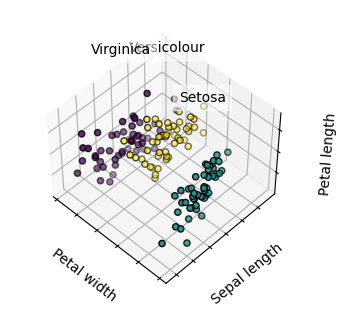

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [61]:
########### Write Your Code Here ###########
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
images = digits.images
labels = digits.target
images.shape, labels.shape

############################################

((1797, 8, 8), (1797,))

###  Visualization of MINIST

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


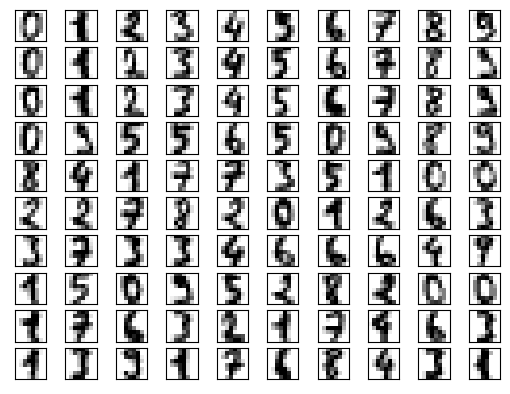

In [64]:
# Visualize MINIST
########### Write Your Code Here ###########

fig, axes = plt.subplots(10, 10, subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='binary', interpolation='nearest')

print(labels[:10 * 10])
############################################

In [74]:
from sklearn.model_selection import train_test_split
X = np.array([i.flatten() for i in images])
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.3, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

### Fit  Model

In [75]:
########### Write Your Code Here ###########

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

############################################

LinearDiscriminantAnalysis()

## Evaluate model

In [77]:
########### Write Your Code Here ###########

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

############################################


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.93      0.93      0.93        56
           2       1.00      0.96      0.98        53
           3       0.92      0.98      0.95        46
           4       1.00      0.93      0.97        61
           5       1.00      0.91      0.95        57
           6       0.98      0.96      0.97        57
           7       0.94      1.00      0.97        50
           8       0.86      0.90      0.88        48
           9       0.86      0.92      0.89        53

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


A: {

Advantages => {performs better when classification relies more on mean than variance. Make use of piror knowledge;}

Disadvantage => {performs poorly on non-Gaussian distributions. Dim reduces to maximize C-1. Possible overfits; }

}

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

PCA is unsupervised learning. PCA can't use prior knowledge. PCA can dimensionality reduce to any dimensions. PCA maximize the variance. 